<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/Copy_of_8_1_3_THEORY_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Using Logistic Regression with a single attribute

We'll train a logistic regression classifier using the implementation of Scikit Learn (`sklearn`), and afterwards visualize the model. To keep things simple and easy to visualize, we start with a synthetic dataset with a single input variable or attribute.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
def sigmoid_function(x, w0, w1):
    '''Equivalent to a perceptron but with a sigmoid function'''
    z = w0 + w1*x  # note: this is a simple linear function
    y = 1 / (1 + np.exp(-z))  #compute the sigmoid function on the output (z) of the linear function
    return y

First, we'll prepare our dataset. In this case, we'll generate a synthetic dataset containing samples with a single input attribute, which can be classified as either one of 2 possible classes. The classes are labelled as `0` or `1`.

In [ ]:
X, y = make_blobs(
    n_samples=1000, centers=2, n_features=1,
    random_state=2, cluster_std=1.5
)

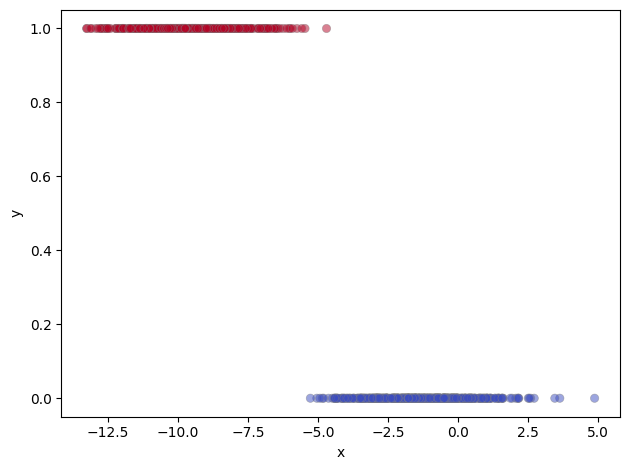

In [ ]:
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

As usual, we can easily find a logistic regression classifier by browsing [sklearn's documentation](https://scikit-learn.org/stable/user_guide.html). In this case, we have the class `LogisticRegression`, with methods `fit` and `predict` to train and perform inference:

In [ ]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.999

Let's print the parameters of the trained model:

In [ ]:
print(clf.coef_, clf.intercept_)

[[-2.81140184]] [-14.9186645]


Using these parameters, we can graph the curve obtained by the logistic regression.

Do note that this is **not** the decision boundary of the model. In this case, since we only have one input variable and one output variable, we can actually plot the result of the model for each possible input alongside the training data.


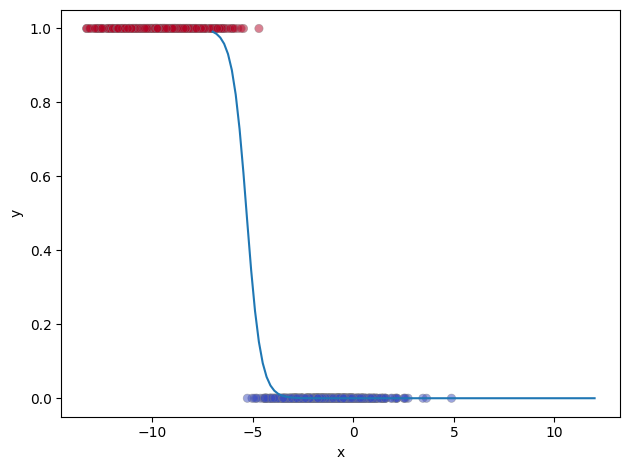

In [ ]:
plt.scatter(X, y, c=y, alpha=0.5, lw=0.5, edgecolor='grey', cmap=cm.coolwarm)

x_plot = np.linspace(-7,12,100)
plt.plot(x_plot, sigmoid_function(x_plot,clf.intercept_[0], clf.coef_[0][0]))

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

We can also obtain the same curve using the `predict_proba` method of the classifier, since it actually applies the same composition of a linear and a sigmoid function we defined before in `sigmoid_function`!

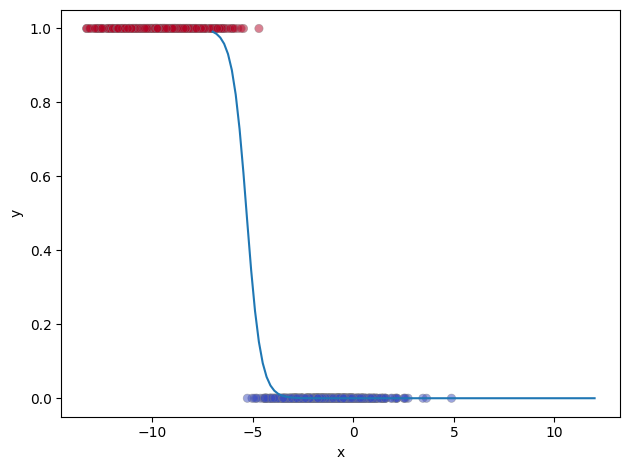

In [ ]:
plt.scatter(X, y, c=y, alpha=0.5, lw=0.5, edgecolor='grey', cmap=cm.coolwarm)

x_plot = np.linspace(-7,12,100)
y_plot = clf.predict_proba(x_plot.reshape(-1,1))[:,1]
plt.plot(x_plot, y_plot)

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

### 2.2 Logistic regression with two Attributes

In terms of training and evaluating the model, the two-attribute case is exactly the same. However, visualizing the results is a bit more complex, since now the input variables lie in a 2D plane. In this case, the colour information will be crucial to visualize the class of each sample.

In [ ]:
X, y = make_blobs(
    n_samples=1000, centers=2, n_features=2,
    random_state=1, cluster_std=2.0
)

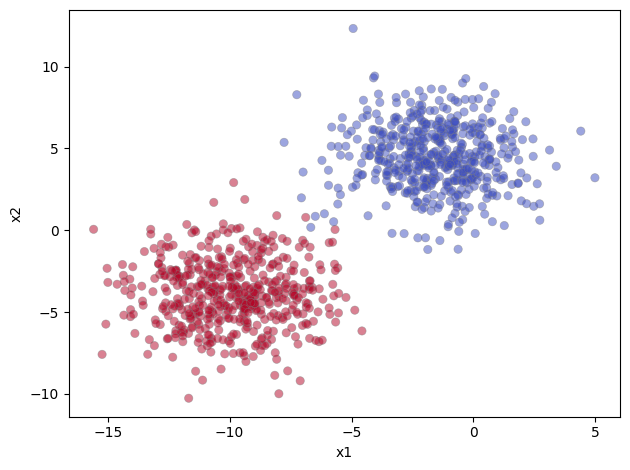

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, lw=0.5, edgecolor='grey', cmap=cm.coolwarm)
plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

Let's train the model and calculate its error on the training set:

In [ ]:
clf = LogisticRegression().fit(X,y)
y_pred = clf.predict(X)
accuracy_score(y, y_pred)

0.998

Now, we can **plot the examples as well as the decision boundary obtained by the model**.

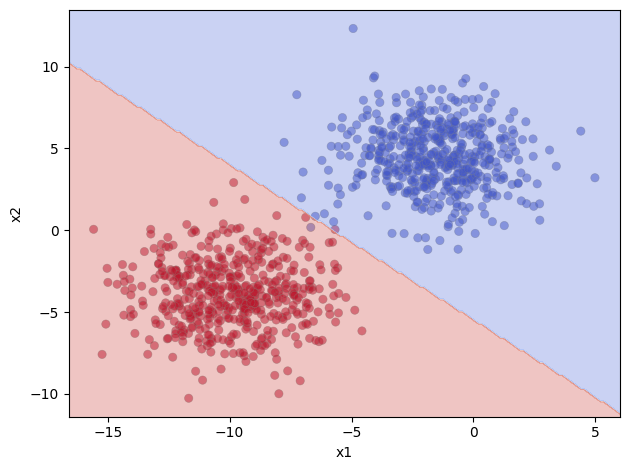

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.5, lw=0.5, edgecolor='grey', cmap=cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(
    np.linspace(*xlim, num=200),
    np.linspace(*ylim, num=200)
)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap=cm.coolwarm)

plt.xlabel('x1')
plt.ylabel('x2')
plt.tight_layout()
plt.show()

In the previous plot, we are using color information to represent the output probabilities of the model. In this case, we can alternatively plot the data and the function learned by the in 3D. In this case, we keep the colors as a reference, but they encode the same information as the y axis.



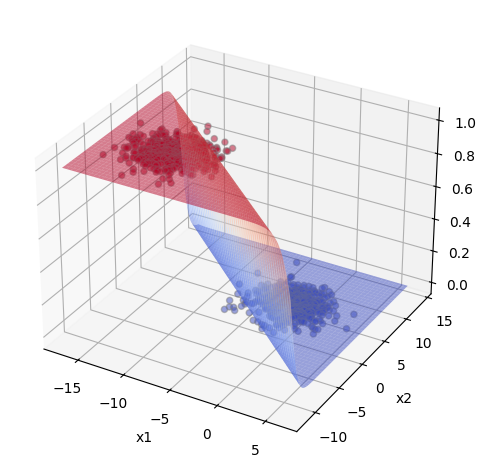

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],y, c=y, alpha=0.5, lw=1, edgecolors='grey', cmap=cm.coolwarm)

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = (clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]).reshape(xx.shape)


surf = ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm,
                   linewidth=0, antialiased=True, alpha = 0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()